In [122]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
data = pd.read_csv('MyEdit_Credit.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MyEdit_Credit.csv'

## Basic Data Exploration

In [55]:
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [57]:
data.shape

(1000, 62)

In [59]:
data.isnull().sum().sum()

0

In [61]:
for col in data.columns:
    print(f"{col}: {len(data[col].unique())}")


Duration: 33
Amount: 921
InstallmentRatePercentage: 4
ResidenceDuration: 4
Age: 53
NumberExistingCredits: 4
NumberPeopleMaintenance: 2
Telephone: 2
ForeignWorker: 2
Class: 2
CheckingAccountStatus.lt.0: 2
CheckingAccountStatus.0.to.200: 2
CheckingAccountStatus.gt.200: 2
CheckingAccountStatus.none: 2
CreditHistory.NoCredit.AllPaid: 2
CreditHistory.ThisBank.AllPaid: 2
CreditHistory.PaidDuly: 2
CreditHistory.Delay: 2
CreditHistory.Critical: 2
Purpose.NewCar: 2
Purpose.UsedCar: 2
Purpose.Furniture.Equipment: 2
Purpose.Radio.Television: 2
Purpose.DomesticAppliance: 2
Purpose.Repairs: 2
Purpose.Education: 2
Purpose.Vacation: 1
Purpose.Retraining: 2
Purpose.Business: 2
Purpose.Other: 2
SavingsAccountBonds.lt.100: 2
SavingsAccountBonds.100.to.500: 2
SavingsAccountBonds.500.to.1000: 2
SavingsAccountBonds.gt.1000: 2
SavingsAccountBonds.Unknown: 2
EmploymentDuration.lt.1: 2
EmploymentDuration.1.to.4: 2
EmploymentDuration.4.to.7: 2
EmploymentDuration.gt.7: 2
EmploymentDuration.Unemployed: 2
Persona

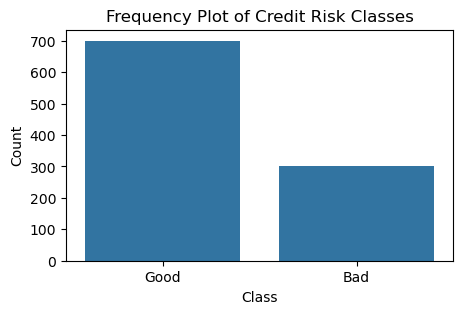

Class
Good    700
Bad     300
Name: count, dtype: int64

Percentage distribution:
Class
Good    70.0
Bad     30.0
Name: proportion, dtype: float64


In [63]:

plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=data)
plt.title('Frequency Plot of Credit Risk Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


print(data['Class'].value_counts())
print("\nPercentage distribution:")
print(data['Class'].value_counts(normalize=True) * 100)


In [64]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [65]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [68]:
y.head()

0    Good
1     Bad
2    Good
3    Good
4     Bad
Name: Class, dtype: object

## Task 1 (a) : Logistic : For whole dataset

In [72]:
from typing import Tuple, List

def calculate_confusion_matrices(y_true, y_prob, thresholds) -> Tuple[List[int], List[int]]:

    tprs: List[float] = []
    fprs: List[float] = []


    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)
        cm = confusion_matrix(y_true, y_pred)
        print(f'Confusion Matrix at threshold {threshold}:\n{cm}')

        tp, fp, fn, tn = cm.ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
        print(f"Accuracy:, {accuracy_score(y_true, y_pred):.3f}")
        print('\n')

        tprs.append(tpr)
        fprs.append(fpr)

    return tprs, fprs    

In [74]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 200, solver = 'liblinear'))
logistic_model.fit(X, Y)

y_prob = logistic_model.predict_proba(X)[:, 1]
thresholds = [0.2, 0.35, 0.5]

tprs, fprs = calculate_confusion_matrices(Y, y_prob, thresholds)

Confusion Matrix at threshold 0.2:
[[ 44 256]
 [  5 695]]
True Positive Rate (TPR): 0.90, False Positive Rate (FPR): 0.27
Accuracy:, 0.739


Confusion Matrix at threshold 0.35:
[[100 200]
 [ 27 673]]
True Positive Rate (TPR): 0.79, False Positive Rate (FPR): 0.23
Accuracy:, 0.773


Confusion Matrix at threshold 0.5:
[[160 140]
 [ 75 625]]
True Positive Rate (TPR): 0.68, False Positive Rate (FPR): 0.18
Accuracy:, 0.785




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohnish dutt\\Downloads\\plots\\Part1A - tpr vs fpr.png'

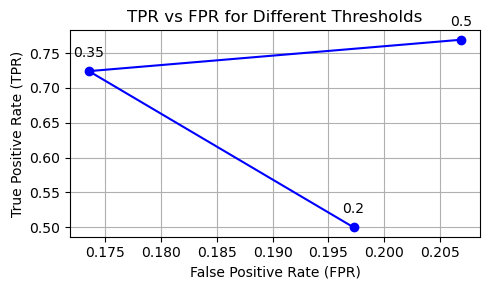

In [120]:
plt.figure(figsize=(5, 3))
plt.plot(fprs, tprs, marker='o', linestyle='-', color='b')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('TPR vs FPR for Different Thresholds')
plt.grid(True)


for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold}', (fprs[i], tprs[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('plots/Part1A - tpr vs fpr.png')
plt.show()


## Task 1 (b) : Logistic : For 70/30 training and test data set

In [ ]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 97)

logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 200, solver = 'liblinear'))
logistic_model.fit(X_train, y_train)

y_prob_test = logistic_model.predict_proba(X_test)[:, 1]
thresholds = [0.2, 0.35, 0.5]

tprs, fprs = calculate_confusion_matrices(y_test, y_prob_test, thresholds)

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(fprs, tprs, marker='o', linestyle='-', color='b')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('TPR vs FPR for Different Thresholds')
plt.grid(True)


for i, threshold in enumerate(thresholds):
    plt.annotate(f'{threshold}', (fprs[i], tprs[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('plots/Part1B - tpr vs fpr.png')
plt.show()


## Task 1 (c) : Logistic : ROC and AUC

In [ ]:
# Compute ROC curve and AUC for the test set
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize = (5,4))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('plots/Part 1C - AUCROC.png')
plt.show()
print(f"Area under curve: {roc_auc:.2f}")

## Task 2 (a) : Classification Tree, Bagging and Random Forest : For whole dataset

In [ ]:
df = pd.read_csv('MyEdit_Credit.csv')
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
# 1. Decision Tree
dt_model = DecisionTreeClassifier(max_depth=100, random_state=97)
dt_model.fit(X, Y)

In [ ]:
# 2. Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=100), n_estimators=100, max_samples=0.66, random_state=97)
bagging_model.fit(X, Y)

In [ ]:
# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, max_features='sqrt', max_samples=0.66, random_state=97)
rf_model.fit(X, Y)

In [85]:
for model, name in zip([dt_model, bagging_model, rf_model], ['Decision Tree', 'Bagging', 'Random Forest']):
    y_pred = model.predict(X)
    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("Accuracy:", accuracy_score(y, y_pred))
    print("\n")

NameError: name 'dt_model' is not defined

## Task 2 (b) : Classification Tree, Bagging Classifier and Random Forest : 
## For 70/30 training and test data set

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 97)

In [90]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=100, random_state=97),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=100), n_estimators=100, max_samples=0.66, random_state=97),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=100, max_features='sqrt', max_samples=0.66, random_state=97)
}

tprs = []
fprs = []
accs = []

for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    tprs.append(tpr)
    fprs.append(fpr)

    acc = accuracy_score(y_test, y_pred)

    accs.append(acc)

    print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
    print(f"Accuracy: {acc:.3f}")

    print("\n")

Model: Decision Tree
Confusion Matrix:
 [[ 41  43]
 [ 41 175]]
True Positive Rate (TPR): 0.50, False Positive Rate (FPR): 0.20
Accuracy: 0.720


Model: Bagging Classifier
Confusion Matrix:
 [[ 42  42]
 [ 16 200]]
True Positive Rate (TPR): 0.72, False Positive Rate (FPR): 0.17
Accuracy: 0.807


Model: Random Forest
Confusion Matrix:
 [[ 30  54]
 [  9 207]]
True Positive Rate (TPR): 0.77, False Positive Rate (FPR): 0.21
Accuracy: 0.790




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohnish dutt\\Downloads\\plots\\Part 2B - Acc and Tpr for models.png'

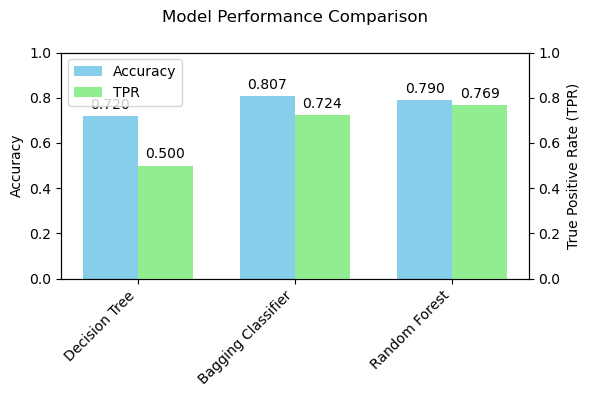

In [91]:
import matplotlib.pyplot as plt
import numpy as np


model_names = list(models.keys())
tpr_values = tprs
accuracy_values = accs


fig, ax1 = plt.subplots(figsize=(6, 4))
fig.suptitle('Model Performance Comparison')


width = 0.35
x = np.arange(len(model_names))


rects1 = ax1.bar(x - width/2, accuracy_values, width, label='Accuracy', color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)


ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, tpr_values, width, label='TPR', color='lightgreen')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_ylim(0, 1)


ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('plots/Part 2B - Acc and Tpr for models.png')
plt.show()


## Task 2 (c) : Classification Tree, Bagging Classifier and Random Forest : 
## Rank and plot of predictors according to their predictive power

In [ ]:
# Random Forest is the best model as it give highest accuracy of 78.7% and 0.763 TPR.
print("# Random Forest as best model for Accuracy: (78.7 %) and TPR: (0.763)")

best_model = models["Random Forest"]
predictive_power = best_model.feature_importances_

predictive_power_df = pd.DataFrame({'Predictors': X.columns, 'Predictive Power': predictive_power})
predictive_power_df = predictive_power_df.sort_values(by = 'Predictive Power', ascending = False)

plt.figure(figsize = (10, 12))
sns.barplot(x = 'Predictive Power', y = 'Predictors', data = predictive_power_df)
plt.title('Predictive Power of predictors for Random Forest Model')
plt.savefig('plots/Part 2C - featureimportance.png')
plt.show()
predictive_power_df

## Task 3 (a) : KNN Classifier : Standardization of predictors and performance on test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 97)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k_values = [1, 3, 5, 10]

tprs = []
fprs = []
accs = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    print(f"K={k}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    acc = accuracy_score(y_test, y_pred)

    tprs.append(tpr)
    fprs.append(fpr)
    accs.append(acc)

    print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {acc:.3f}")
    print('\n')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


model_names = ['k=1', 'k=3', 'k=5', 'k=10']
tpr_values = tprs
accuracy_values = accs


fig, ax1 = plt.subplots(figsize=(6, 4))
fig.suptitle('Model Performance Comparison')


width = 0.35
x = np.arange(len(model_names))


rects1 = ax1.bar(x - width/2, accuracy_values, width, label='Accuracy', color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)


ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, tpr_values, width, label='TPR', color='lightgreen')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_ylim(0, 1)


ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('plots/Part 3A - Acc and Tpr for models.png')
plt.show()


## Task 4 (a) : Fitting on LinearSVC model

In [ ]:
df = pd.read_csv('MyEdit_Credit.csv')

X = df.drop('Class', axis = 1)
y = df['Class']

In [97]:
y = LabelEncoder().fit_transform(y)

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")


X_train shape (700, 61)
X_test shape (300, 61)
y_train shape (700,)
y_test shape (300,)


### Linear Kernel

In [104]:
# grid search for LinearSVC over C
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}

grid = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score:, {grid.best_score_:.4f}")

Best parameters: {'C': 0.1}
Best cross-validation score:, 0.7571


In [105]:
best_model = LinearSVC(C=0.01)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

acc = accuracy_score(y_test, y_pred)


print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print('\n')

Confusion Matrix:
 [[ 41  51]
 [ 18 190]]
True Positive Rate (TPR): 0.69, False Positive Rate (FPR): 0.21
Accuracy: 0.770




### Radial Kernel

In [109]:
# grid search over parameters

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.5, 1, 2, 3, 4]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score:, {grid.best_score_:.4f}")

Best parameters: {'C': 0.1, 'gamma': 0.5}
Best cross-validation score:, 0.7029


In [110]:
best_model = SVC(kernel='rbf', C=0.1, gamma=0.5)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

acc = accuracy_score(y_test, y_pred)


print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print('\n')

Confusion Matrix:
 [[  0  92]
 [  0 208]]
True Positive Rate (TPR): nan, False Positive Rate (FPR): 0.31
Accuracy: 0.693




## Task 4(b) : Balancing the Dataset

In [112]:
data = pd.read_csv('MyEdit_Credit.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohnish dutt\\Downloads\\plots\\Part 4B: Data imbalance.png'

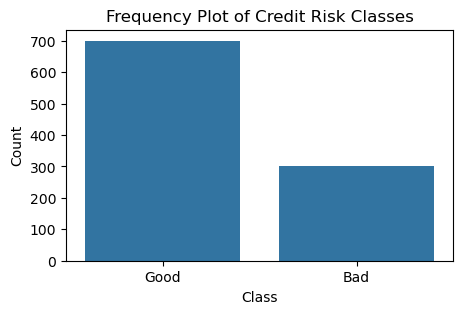

In [113]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=data)
plt.title('Frequency Plot of Credit Risk Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('plots/Part 4B: Data imbalance.png')
plt.show()


print(data['Class'].value_counts())
print("\nPercentage distribution:")
print(data['Class'].value_counts(normalize=True) * 100)


In [ ]:
X = df.drop('Class', axis = 1)
y = df['Class']

y = LabelEncoder().fit_transform(y)

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=97)

In [ ]:
from imblearn.over_sampling import SMOTE

sm  = SMOTE(random_state=97)

X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

#### Testing Logistic Regression

In [ ]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 200, solver = 'liblinear'))
logistic_model.fit(X_res_train, y_res_train)

y_prob_test = logistic_model.predict_proba(X_test)[:, 1]
thresholds = [0.2, 0.35, 0.5]

calculate_confusion_matrices(y_test, y_prob_test, thresholds)

#### Testing LinearSVC

In [ ]:
# grid search for LinearSVC over C
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}

grid = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid.fit(X_res_train, y_res_train)

print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score:, {grid.best_score_:.4f}")

In [ ]:
best_model = LinearSVC(C=5)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

acc = accuracy_score(y_test, y_pred)


print(f'True Positive Rate (TPR): {tpr:.2f}, False Positive Rate (FPR): {fpr:.2f}')
report = classification_report(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print('\n')